This notebook trains the CWW+SB4 templates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.interpolate import interp1d

from modules import get_bandpass_dict, get_eff_wavelen, Sed, \
                    create_training_sets, train_templates

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

Load the filters

In [3]:
bandpass_dict = get_bandpass_dict()

Load the galaxy redshift catalog

In [4]:
with open('data/training_catalog.pkl', 'rb') as input:
    galaxies = pickle.load(input)

Load the CWW+SB4 templates

In [5]:
cwwsb4_templates = dict()
step = 100
lambda_min = 10
lambda_max = 15000

x, y = np.loadtxt('templates/El_B2004a.sed',unpack=True)
sed = Sed()
sed.wavelen = np.arange(lambda_min,lambda_max,step,dtype=float)
sed.flambda = np.interp(sed.wavelen,x,y)
cwwsb4_templates['El'] = sed

x, y = np.loadtxt('templates/Sbc_B2004a.sed',unpack=True)
sed = Sed()
sed.wavelen = np.arange(lambda_min,lambda_max,step,dtype=float)
sed.flambda = np.interp(sed.wavelen,x,y)
cwwsb4_templates['Sbc'] = sed

x, y = np.loadtxt('templates/Scd_B2004a.sed',unpack=True)
sed = Sed()
sed.wavelen = np.arange(lambda_min,lambda_max,step,dtype=float)
sed.flambda = np.interp(sed.wavelen,x,y)
cwwsb4_templates['Scd'] = sed

x, y = np.loadtxt('templates/Im_B2004a.sed',unpack=True)
sed = Sed()
sed.wavelen = np.arange(lambda_min,lambda_max,step,dtype=float)
sed.flambda = np.interp(sed.wavelen,x,y)
cwwsb4_templates['Im'] = sed

x, y = np.loadtxt('templates/SB3_B2004a.sed',unpack=True)
sed = Sed()
sed.wavelen = np.arange(lambda_min,lambda_max,step,dtype=float)
sed.flambda = np.interp(sed.wavelen,x,y)
cwwsb4_templates['SB3'] = sed

x, y = np.loadtxt('templates/SB2_B2004a.sed',unpack=True)
sed = Sed()
sed.wavelen = np.arange(lambda_min,lambda_max,step,dtype=float)
sed.flambda = np.interp(sed.wavelen,x,y)
cwwsb4_templates['SB2'] = sed

x, y = np.loadtxt('templates/ssp_25Myr_z008.sed',unpack=True)
sed = Sed()
sed.wavelen = np.arange(lambda_min,lambda_max,step,dtype=float)
sed.flambda = np.interp(sed.wavelen,x,y)
cwwsb4_templates['25Myr'] = sed

x, y = np.loadtxt('templates/ssp_5Myr_z008.sed',unpack=True)
sed = Sed()
sed.wavelen = np.arange(lambda_min,lambda_max,step,dtype=float)
sed.flambda = np.interp(sed.wavelen,x,y)
cwwsb4_templates['5Myr'] = sed

Create training sets and plot them

In [6]:
%%time
training_sets = create_training_sets(cwwsb4_templates, galaxies, bandpass_dict)

CPU times: user 1min 58s, sys: 56.4 ms, total: 1min 58s
Wall time: 1min 58s


Number of fluxes in each training set:
[77116, 135344, 183645, 101659, 73115, 37910, 5302, 337]


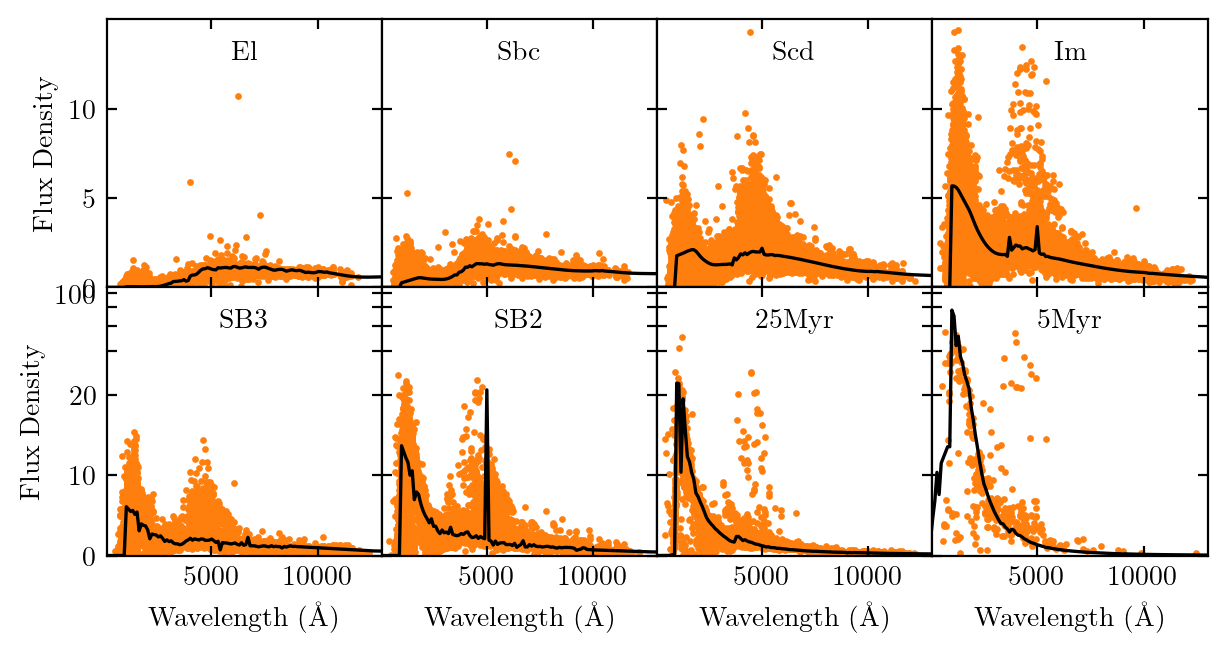

In [9]:
fig, axes = plt.subplots(2,4,sharex='all',sharey='row',figsize=(twocol,twocol*1/2))

print("Number of fluxes in each training set:")
print([len(i) for i in training_sets.values()])

for (ax,template) in zip(axes.flatten(),cwwsb4_templates):
    
    wavelen = [row[0] for row in training_sets[template]]
    fluxes = [row[1] for row in training_sets[template]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    sed = cwwsb4_templates[template]
    ax.plot(sed.wavelen, sed.flambda, ls="-", c="k")
    
    ax.text(0.5,0.85,template,transform=ax.transAxes,ha="center")

plt.xlim(100,13000)

axes[0,0].set_ylim(0,15)
axes[1,0].set_ylim(0,110)
axes[1,0].set_yscale('symlog',linthreshy=20)

axes[0,0].set_yticks([0,5,10])
axes[1,0].set_yticks([0,10,20,40,60,80,100])
axes[1,0].set_yticklabels([0,10,20,'','','',100])

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Now train the templates

In [10]:
%%time
trained_templates, final_sets = train_templates(cwwsb4_templates, galaxies, bandpass_dict, w=2)

Round 1/5
Round 2/5
Round 3/5
Round 4/5
Round 5/5


/home/jfcrenshaw/documents/dirac/photoz_template_learning/modules.py:243: RuntimeWarning: divide by zero encountered in true_divide
  template.flambda /= scale
/home/jfcrenshaw/documents/dirac/photoz_template_learning/modules.py:243: RuntimeWarning: invalid value encountered in true_divide
  template.flambda /= scale
/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Generating final sets
Done!
CPU times: user 29min 40s, sys: 10.3 s, total: 29min 51s
Wall time: 23min 8s


Plot the results

In [23]:
"""# Load the trained templates from files if you didn't run the training algorithm
trained_templates = dict()
for template in naive_templates:
    x,y = np.loadtxt('templates/'+template+'_trained.sed',unpack=True)
    trained_templates[template] = Sed(x,y)
    
final_sets = create_training_sets(trained_templates, galaxies, bandpass_dict)"""

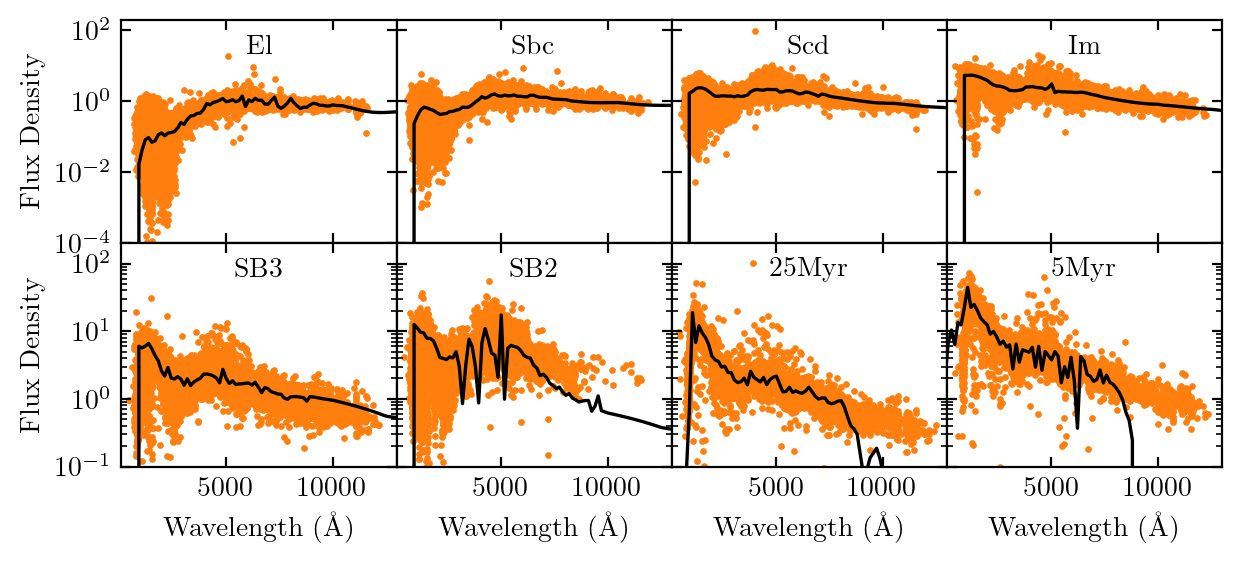

In [10]:
fig, axes = plt.subplots(2,4,sharex='all',sharey='row',figsize=(twocol,5/12*twocol))

for (ax,template) in zip(axes.flatten(),trained_templates):
    
    wavelen = [row[0] for row in final_sets[template]]
    fluxes = [row[1] for row in final_sets[template]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    sed = trained_templates[template]
    ax.plot(sed.wavelen, sed.flambda, ls="-", c="k")
    
    ax.text(0.5,0.85,template,transform=ax.transAxes,ha="center")

plt.xlim(100,13000)
axes[0,0].set_ylim(0.0001,200)
axes[1,0].set_ylim(0.1,200)
axes[0,0].set_yscale('log')
axes[1,0].set_yscale('log')

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

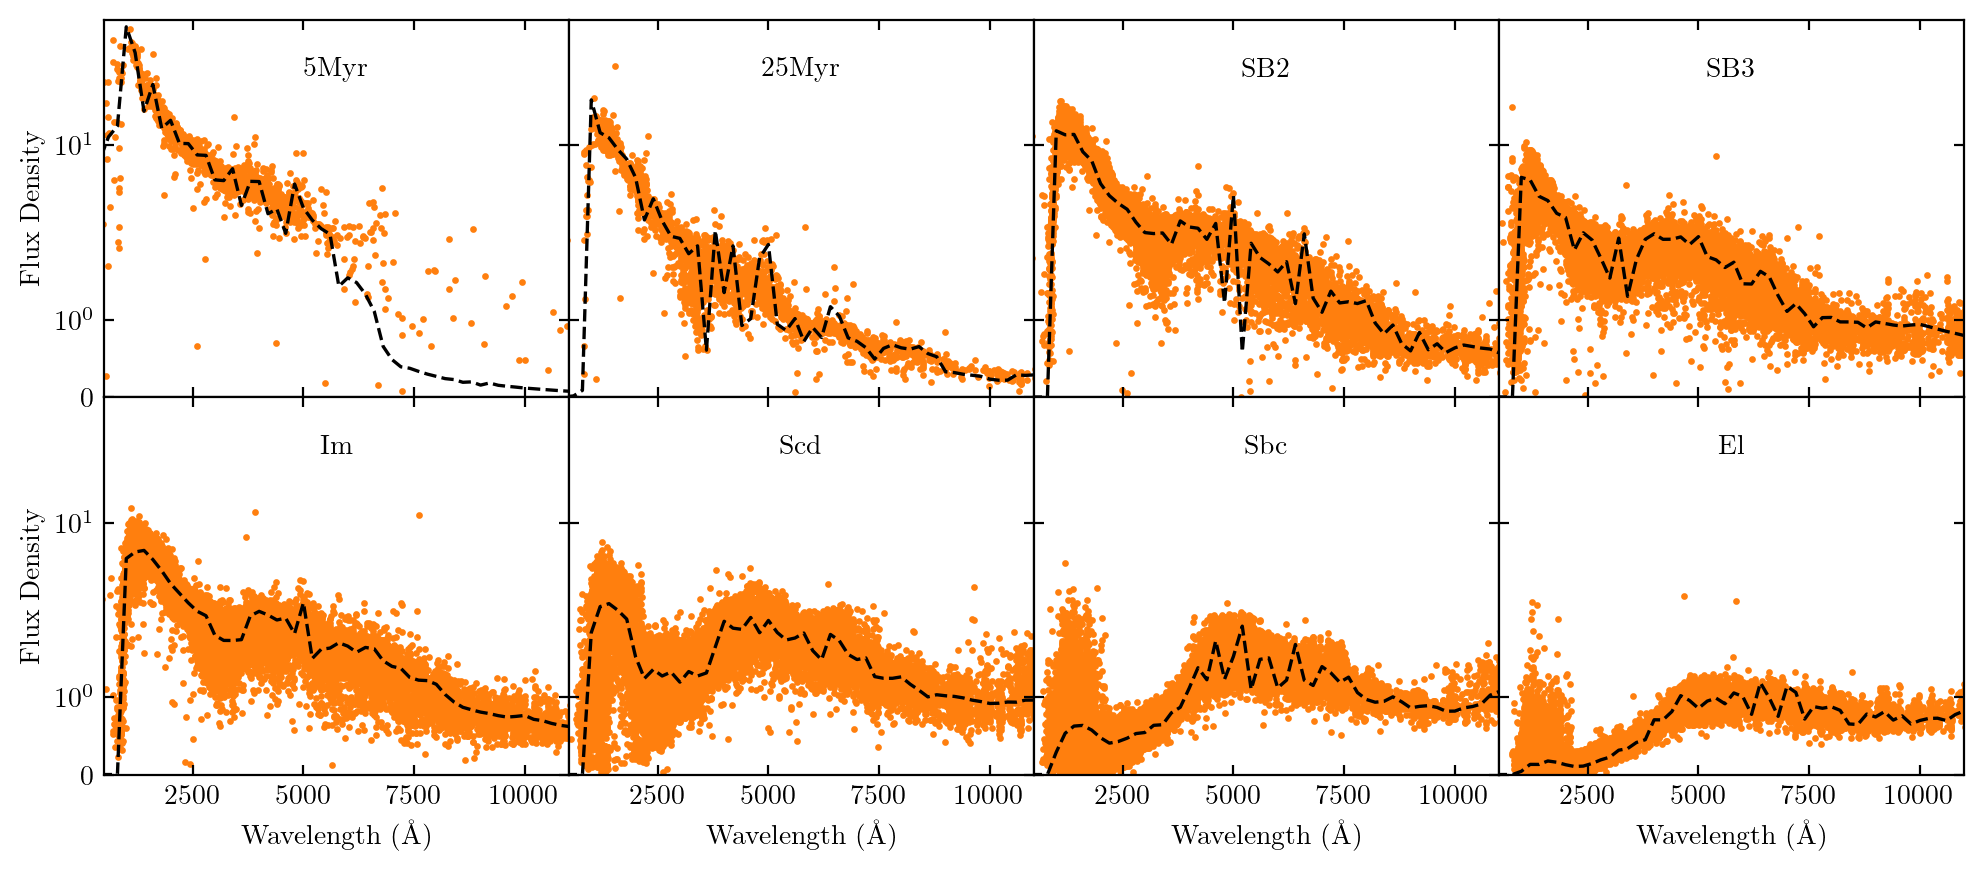

In [7]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,sharex='all',sharey='all',figsize=(12,5))

templates = ['5Myr','25Myr','SB2','SB3','Im','Scd','Sbc','El']
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for i,template in enumerate(templates):
    
    ax = axes[i]
    
    wavelen = [row[0] for row in final_sets[template]]
    fluxes = [row[1] for row in final_sets[template]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    sed = trained_templates[template]
    ax.plot(sed.wavelen, sed.flambda, ls="--", c="k")
    
    ax.text(0.5,0.85,template,transform=ax.transAxes,ha="center")

plt.xlim(500,11000)
plt.ylim(0,80)
ax5.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax6.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax7.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax8.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax1.set_ylabel('Flux Density')
ax5.set_ylabel('Flux Density')
plt.subplots_adjust(wspace=0, hspace=0)
plt.yscale('symlog')

plt.show()

Plot the trained CWW+SB4 templates with the originals

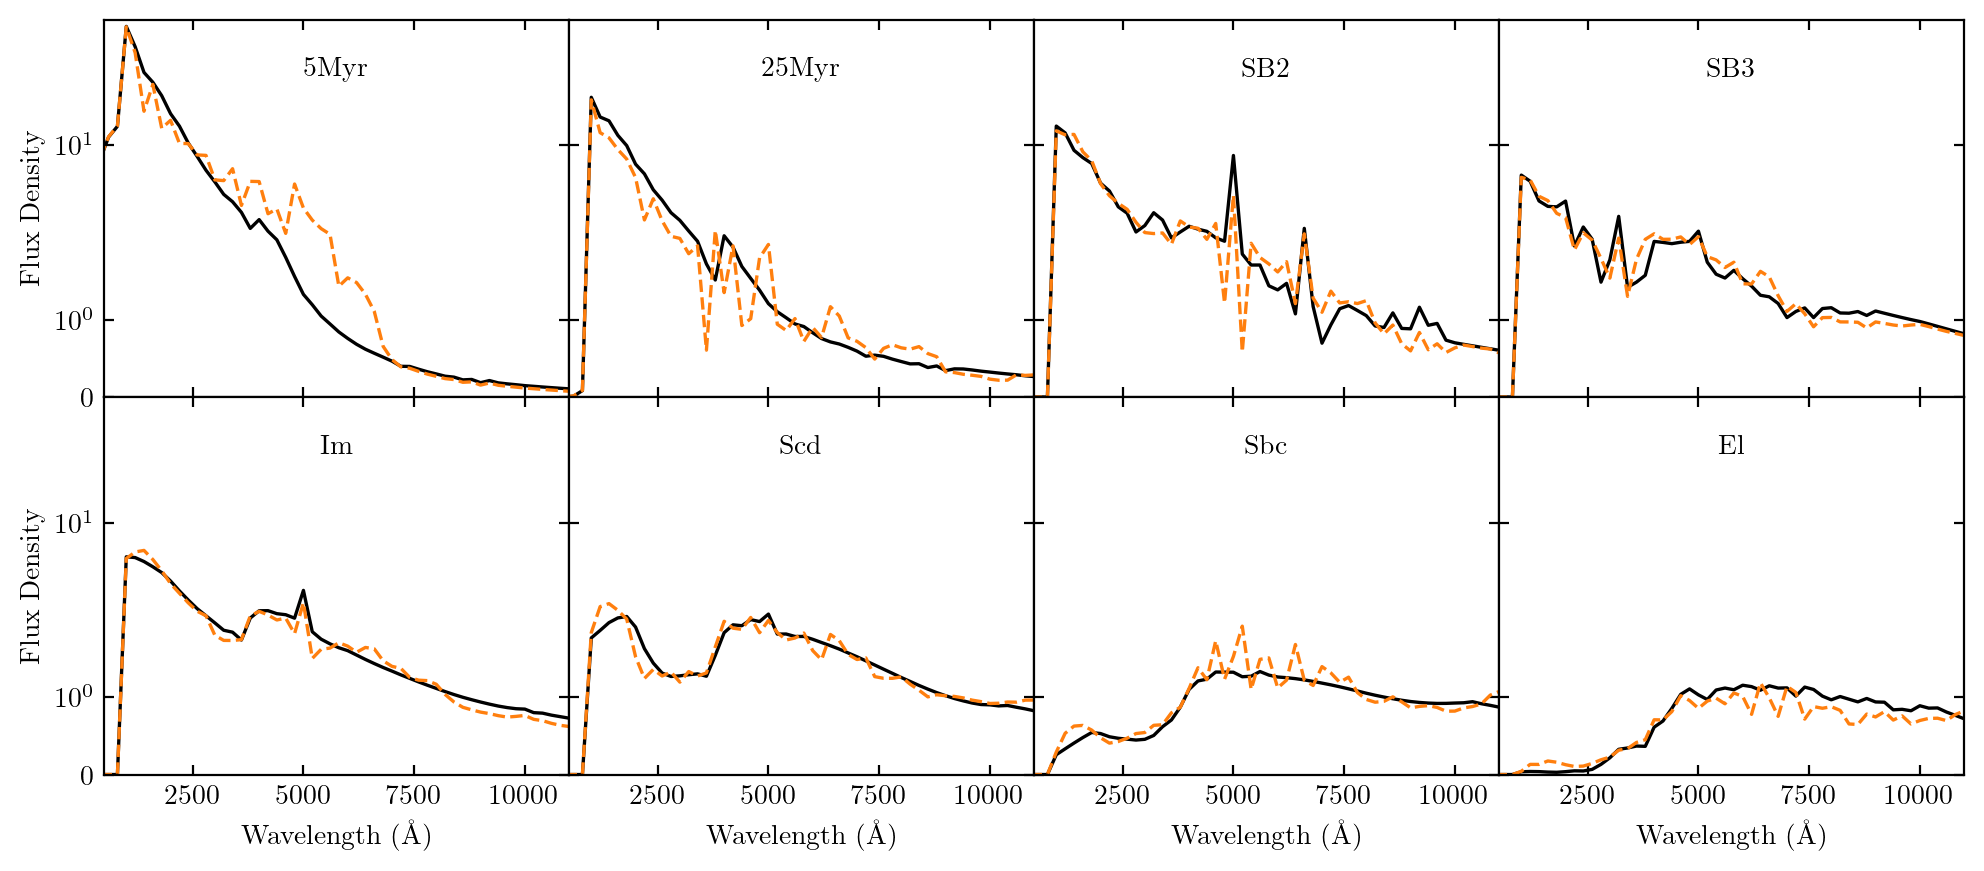

In [8]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,sharex='all',sharey='all',figsize=(12,5))

templates = ['5Myr','25Myr','SB2','SB3','Im','Scd','Sbc','El']
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for i,template in enumerate(templates):
    
    ax = axes[i]

    sed = cwwsb4_templates[template]
    ax.plot(sed.wavelen, sed.flambda, ls="-", c="k")
    
    sed = trained_templates[template]
    ax.plot(sed.wavelen, sed.flambda, ls="--", c="C1")
    
    ax.text(0.5,0.85,template,transform=ax.transAxes,ha="center")

plt.xlim(500,11000)
plt.ylim(0,80)
ax5.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax6.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax7.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax8.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax1.set_ylabel('Flux Density')
ax5.set_ylabel('Flux Density')
plt.subplots_adjust(wspace=0, hspace=0)
plt.yscale('symlog')

#fig.savefig("plots/cwwsb4_beforeANDafter.pdf")
plt.show()

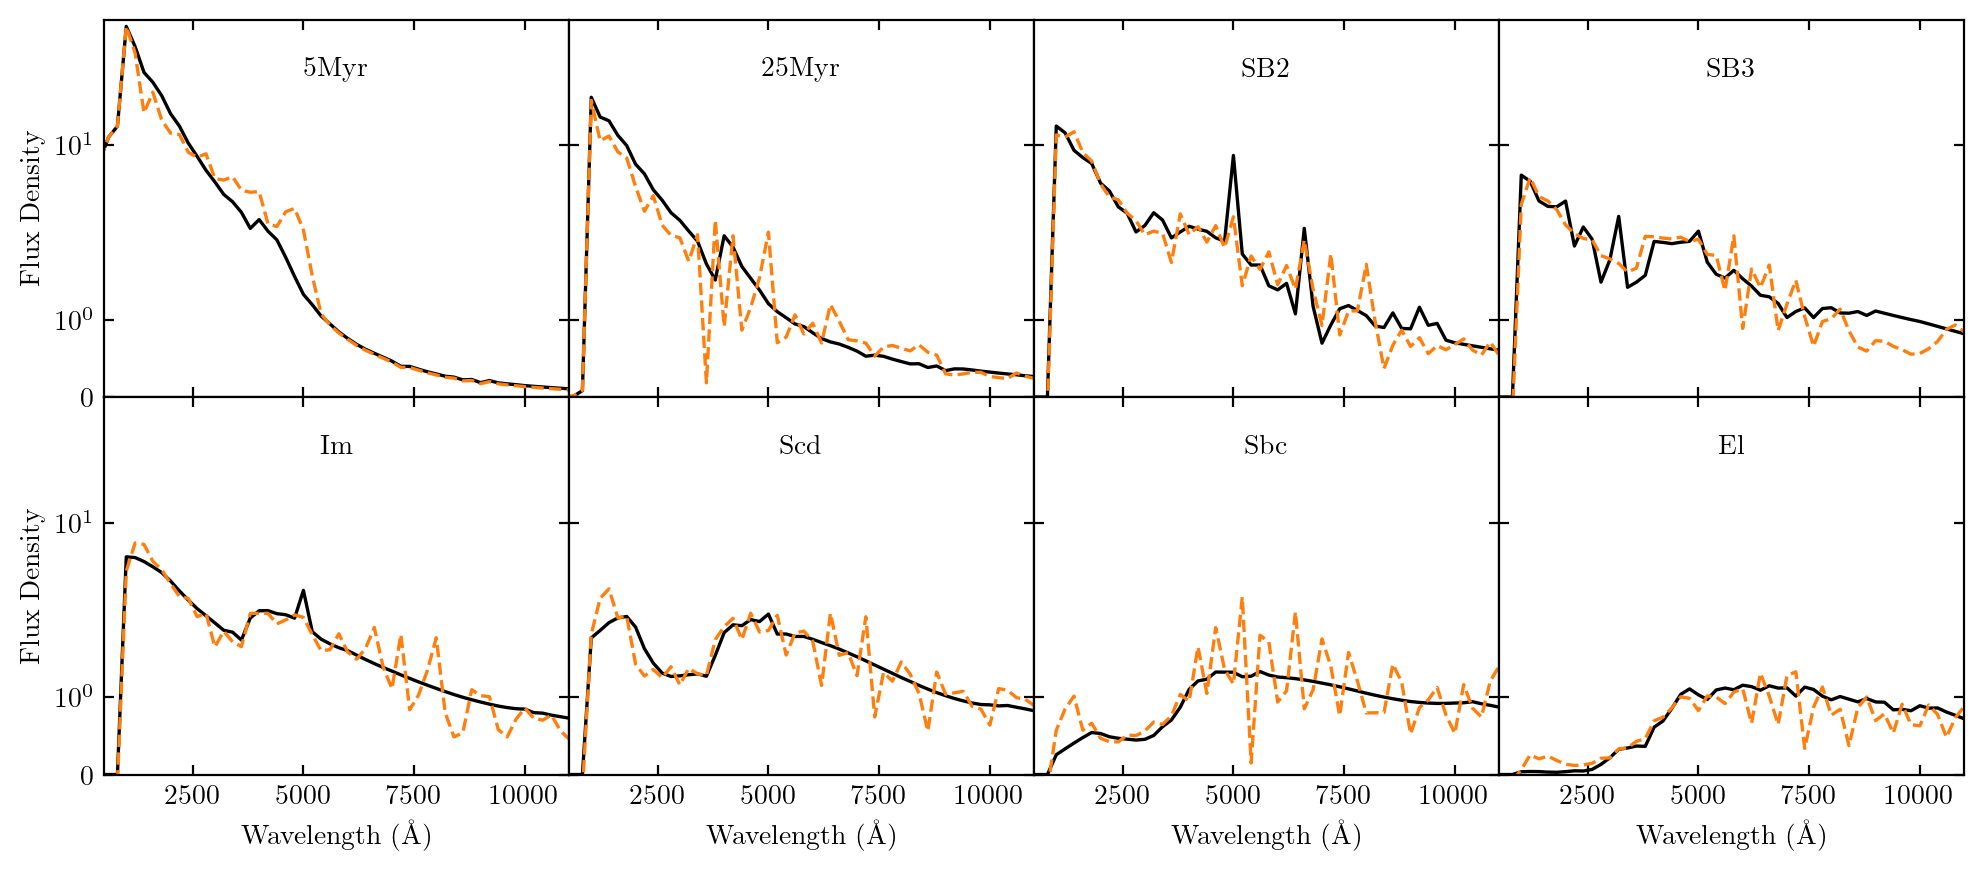

In [13]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,sharex='all',sharey='all',figsize=(12,5))

templates = ['5Myr','25Myr','SB2','SB3','Im','Scd','Sbc','El']
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for i,template in enumerate(templates):
    
    ax = axes[i]

    sed = cwwsb4_templates[template]
    ax.plot(sed.wavelen, sed.flambda, ls="-", c="k")
    
    sed = trained_templates[template]
    ax.plot(sed.wavelen, sed.flambda, ls="--", c="C1")
    
    ax.text(0.5,0.85,template,transform=ax.transAxes,ha="center")

plt.xlim(500,11000)
plt.ylim(0,80)
ax5.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax6.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax7.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax8.set_xlabel('Wavelength ($\mathrm{\AA}$)')
ax1.set_ylabel('Flux Density')
ax5.set_ylabel('Flux Density')
plt.subplots_adjust(wspace=0, hspace=0)
plt.yscale('symlog')

#fig.savefig("plots/cwwsb4_beforeANDafter.pdf")
plt.show()

Save the results!

In [8]:
for template in trained_templates:
    file = open('templates/'+template+'_trained.sed','w')
    x = trained_templates[template].wavelen*10 # save as Angstroms for BPZ
    y = trained_templates[template].flambda
    for i in range(len(x)):
        file.write("{0:<10.2f}{1:<10.2f}\n".format(x[i],y[i]))
    file.close()